In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

In [2]:
def read_world_bank_csv(filename):
    """Read World Bank CSV file, skip metadata rows"""
    with open(filename, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    start_row = 0
    for i, line in enumerate(lines):
        if 'Country Name' in line:
            start_row = i
            break
    
    df = pd.read_csv(filename, skiprows=start_row, encoding='utf-8')
    return df

In [3]:
print("Reading unemployment.csv...")
df_unemployment = read_world_bank_csv('unemployment.csv')
print(f"Unemployment data: {df_unemployment.shape}")

Reading unemployment.csv...
Unemployment data: (266, 70)


In [4]:
print("Reading Inflation.csv...")
df_inflation = read_world_bank_csv('Inflation.csv')
print(f"Inflation data: {df_inflation.shape}")

Reading Inflation.csv...
Inflation data: (266, 70)


In [5]:
print("Reading GDP_per_capita.csv...")
df_gdp_per_capita = read_world_bank_csv('GDP_per_capita.csv')
print(f"GDP per capita data: {df_gdp_per_capita.shape}")

Reading GDP_per_capita.csv...
GDP per capita data: (266, 70)


In [6]:
print("Reading GDP.csv...")
df_gdp_total = read_world_bank_csv('GDP.csv')
print(f"Total GDP data: {df_gdp_total.shape}")

Reading GDP.csv...
Total GDP data: (266, 70)


In [7]:
print("Reading Country_Codes.csv...")
df_country_codes = pd.read_csv('Country_Codes.csv', encoding='utf-8')
print(f"Country codes data: {df_country_codes.shape}")

Reading Country_Codes.csv...
Country codes data: (265, 6)


In [8]:
print("Starting merge...")
merged_df = df_unemployment.copy()
print(f"Base data (unemployment): {merged_df.shape}")

Starting merge...
Base data (unemployment): (266, 70)


In [9]:
merged_df = pd.merge(merged_df, df_inflation, on=['Country Name', 'Country Code'], 
                    how='outer', suffixes=('_unemployment', '_inflation'))
print(f"After merging inflation: {merged_df.shape}")

After merging inflation: (266, 138)


In [10]:
merged_df = pd.merge(merged_df, df_gdp_per_capita, on=['Country Name', 'Country Code'], 
                    how='outer', suffixes=('', '_gdp_per_capita'))
print(f"After merging GDP per capita: {merged_df.shape}")

After merging GDP per capita: (266, 206)


In [11]:
merged_df = pd.merge(merged_df, df_gdp_total, on=['Country Name', 'Country Code'], 
                    how='outer', suffixes=('', '_gdp_total'))
print(f"After merging total GDP: {merged_df.shape}")

After merging total GDP: (266, 274)


In [12]:
merged_df = pd.merge(merged_df, df_country_codes, on='Country Code', how='left')
print(f"After merging country codes: {merged_df.shape}")

After merging country codes: (266, 279)


In [13]:
print("Saving complete integrated data...")
complete_csv = 'integrated_data_complete.csv'
merged_df.to_csv(complete_csv, index=False, encoding='utf-8-sig')
print(f"Complete CSV saved: {complete_csv}")

Saving complete integrated data...
Complete CSV saved: integrated_data_complete.csv


In [14]:
complete_excel = 'integrated_data_complete.xlsx'
merged_df.to_excel(complete_excel, index=False)
print(f"Complete Excel saved: {complete_excel}")

Complete Excel saved: integrated_data_complete.xlsx


In [15]:
total_cells = merged_df.shape[0] * merged_df.shape[1]
null_cells = merged_df.isnull().sum().sum()
completeness = (total_cells - null_cells) / total_cells * 100

print("Complete data statistics:")
print(f"Data dimensions: {merged_df.shape[0]} rows x {merged_df.shape[1]} columns")
print(f"Data completeness: {completeness:.1f}%")
print(f"Total cells: {total_cells:,}")
print(f"Null cells: {null_cells:,}")

Complete data statistics:
Data dimensions: 266 rows x 279 columns
Data completeness: 69.8%
Total cells: 74,214
Null cells: 22,399


In [16]:
print("Data preview:")
print(merged_df.head())

Data preview:
                  Country Name Country Code  \
0                  Afghanistan          AFG   
1  Africa Eastern and Southern          AFE   
2   Africa Western and Central          AFW   
3                      Albania          ALB   
4                      Algeria          DZA   

                         Indicator Name_unemployment  \
0  Unemployment, total (% of total labor force) (...   
1  Unemployment, total (% of total labor force) (...   
2  Unemployment, total (% of total labor force) (...   
3  Unemployment, total (% of total labor force) (...   
4  Unemployment, total (% of total labor force) (...   

  Indicator Code_unemployment  1960_unemployment  1961_unemployment  \
0              SL.UEM.TOTL.ZS                NaN                NaN   
1              SL.UEM.TOTL.ZS                NaN                NaN   
2              SL.UEM.TOTL.ZS                NaN                NaN   
3              SL.UEM.TOTL.ZS                NaN                NaN   
4          

In [18]:
analysis_years = ['2019', '2020', '2021', '2022', '2023']

unemployment_cols = [col for col in merged_df.columns if any(year in col for year in analysis_years) and 'unemployment' in col.lower()]
inflation_cols = [col for col in merged_df.columns if any(year in col for year in analysis_years) and 'inflation' in col.lower()]
gdp_pc_cols = [col for col in merged_df.columns if any(year in col for year in analysis_years) and 'gdp' in col.lower() and 'per capita' in col.lower()]
gdp_total_cols = [col for col in merged_df.columns if any(year in col for year in analysis_years) and 'gdp' in col.lower() and 'per capita' not in col.lower()]

print(f"Found columns:")
print(f"Unemployment: {len(unemployment_cols)} columns")
print(f"Inflation: {len(inflation_cols)} columns") 
print(f"GDP Per Capita: {len(gdp_pc_cols)} columns")
print(f"GDP Total: {len(gdp_total_cols)} columns")

Found columns:
Unemployment: 5 columns
Inflation: 5 columns
GDP Per Capita: 0 columns
GDP Total: 5 columns


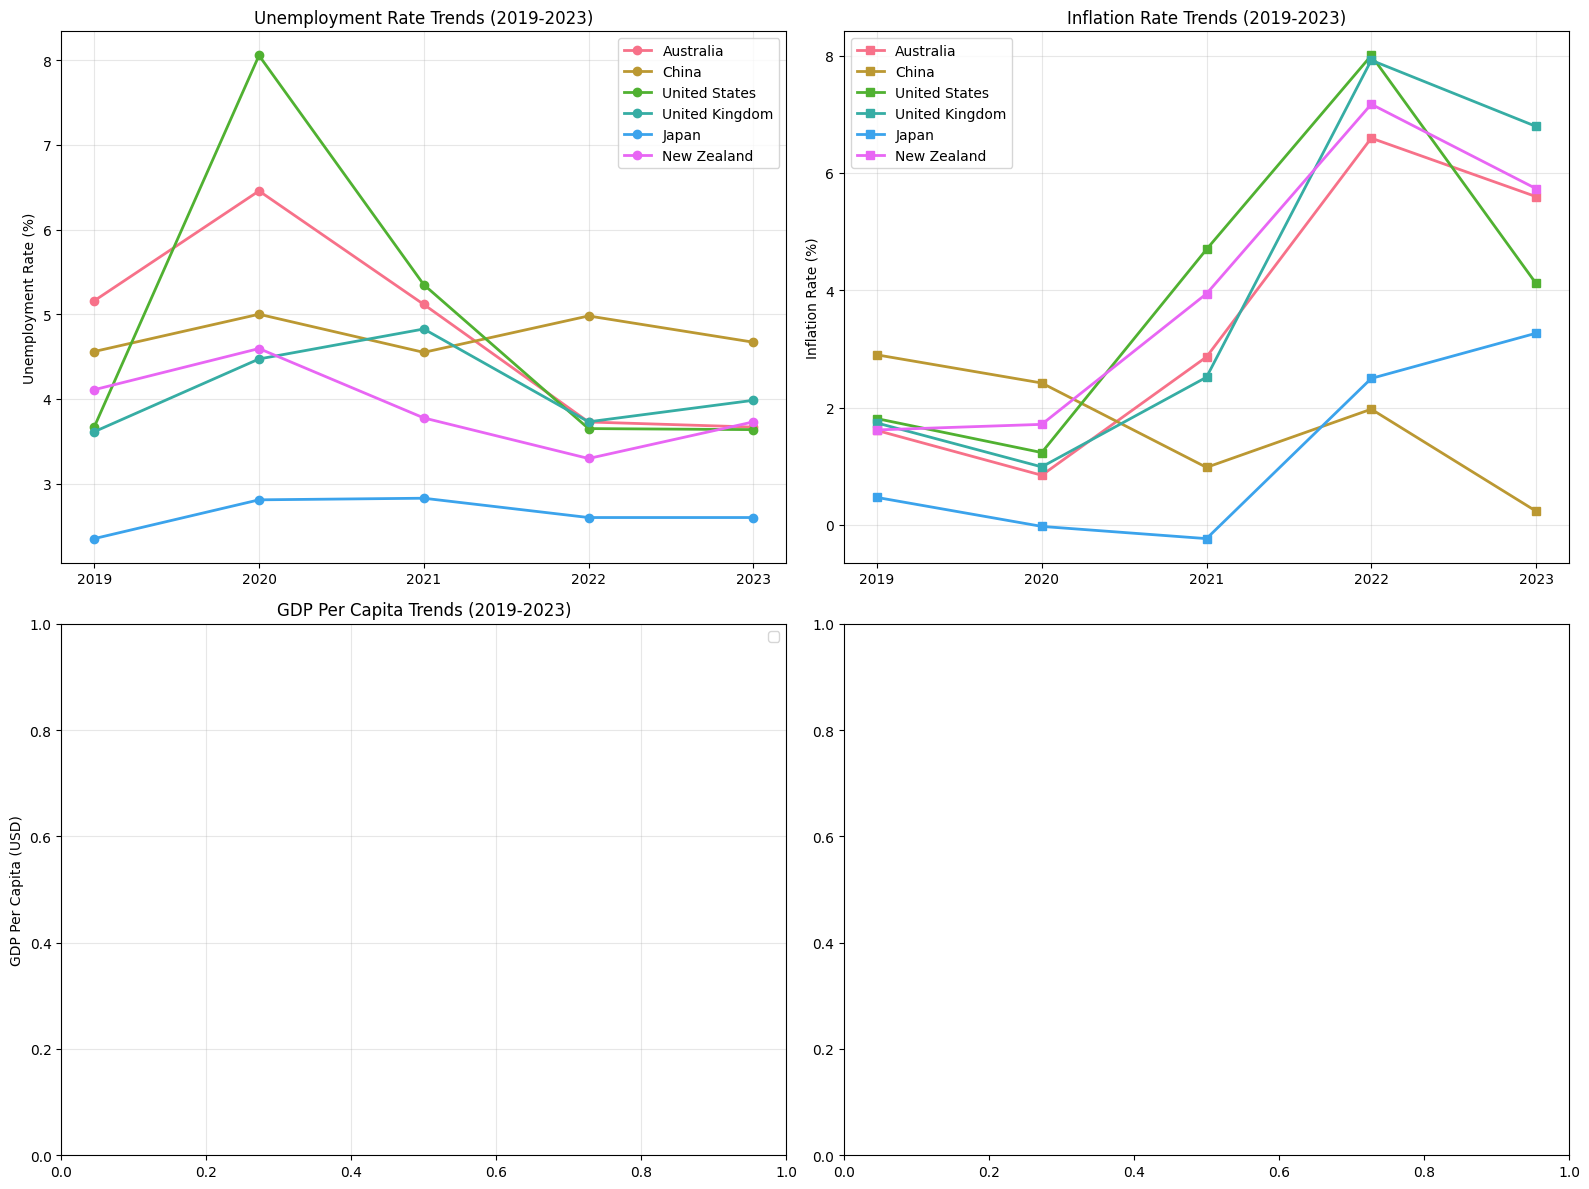

In [23]:
# 创建时间序列图
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 准备时间序列数据
years = ['2019', '2020', '2021', '2022', '2023']

# 为重点国家绘制时间序列
plot_countries = available_countries[:6]  # 选择前6个国家避免图表过于拥挤

for country in plot_countries:
    country_data = merged_df[merged_df['Country Name'] == country]
    if not country_data.empty:
        
        # 失业率趋势
        unemployment_values = []
        for year in years:
            col = [c for c in merged_df.columns if year in c and 'unemployment' in c.lower()]
            if col:
                val = country_data[col[0]].iloc[0]
                unemployment_values.append(val if pd.notna(val) else None)
        
        if any(v is not None for v in unemployment_values):
            ax1.plot(years, unemployment_values, marker='o', label=country, linewidth=2)
        
        # 通胀率趋势
        inflation_values = []
        for year in years:
            col = [c for c in merged_df.columns if year in c and 'inflation' in c.lower()]
            if col:
                val = country_data[col[0]].iloc[0]
                inflation_values.append(val if pd.notna(val) else None)
        
        if any(v is not None for v in inflation_values):
            ax2.plot(years, inflation_values, marker='s', label=country, linewidth=2)

ax1.set_title('Unemployment Rate Trends (2019-2023)')
ax1.set_ylabel('Unemployment Rate (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.set_title('Inflation Rate Trends (2019-2023)')
ax2.set_ylabel('Inflation Rate (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# GDP增长率计算和可视化
for country in plot_countries:
    country_data = merged_df[merged_df['Country Name'] == country]
    if not country_data.empty:
        
        # GDP per capita 趋势
        gdp_pc_values = []
        for year in years:
            col = [c for c in merged_df.columns if year in c and 'gdp' in c.lower() and ('per capita' in c.lower() or 'per_capita' in c.lower())]
            if col:
                val = country_data[col[0]].iloc[0]
                gdp_pc_values.append(val if pd.notna(val) else None)
        
        if any(v is not None for v in gdp_pc_values):
            ax3.plot(years, gdp_pc_values, marker='^', label=country, linewidth=2)

ax3.set_title('GDP Per Capita Trends (2019-2023)')
ax3.set_ylabel('GDP Per Capita (USD)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# COVID-19影响分析（2020年变化）
covid_impact = []
countries_with_data = []

for country in available_countries[:8]:
    country_data = merged_df[merged_df['Country Name'] == country]
    if not country_data.empty:
        # 计算2019到2020年GDP per capita变化
        gdp_2019 = [c for c in merged_df.columns if '2019' in c and 'gdp' in c.lower() )]
        gdp_2020 = [c for c in merged_df.columns if '2020' in c and 'gdp' in c.lower() )]
        
        if gdp_2019 and gdp_2020:
            val_2019 = country_data[gdp_2019[0]].iloc[0]
            val_2020 = country_data[gdp_2020[0]].iloc[0]
            
            if pd.notna(val_2019) and pd.notna(val_2020) and val_2019 > 0:
                change = ((val_2020 - val_2019) / val_2019) * 100
                covid_impact.append(change)
                countries_with_data.append(country)

if covid_impact:
    bars = ax4.bar(countries_with_data, covid_impact, 
                   color=['red' if x < 0 else 'green' for x in covid_impact])
    ax4.set_title('COVID-19 Impact: GDP Per Capita Change (2019-2020)')
    ax4.set_ylabel('Change (%)')
    ax4.set_xticklabels(countries_with_data, rotation=45, ha='right')
    ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

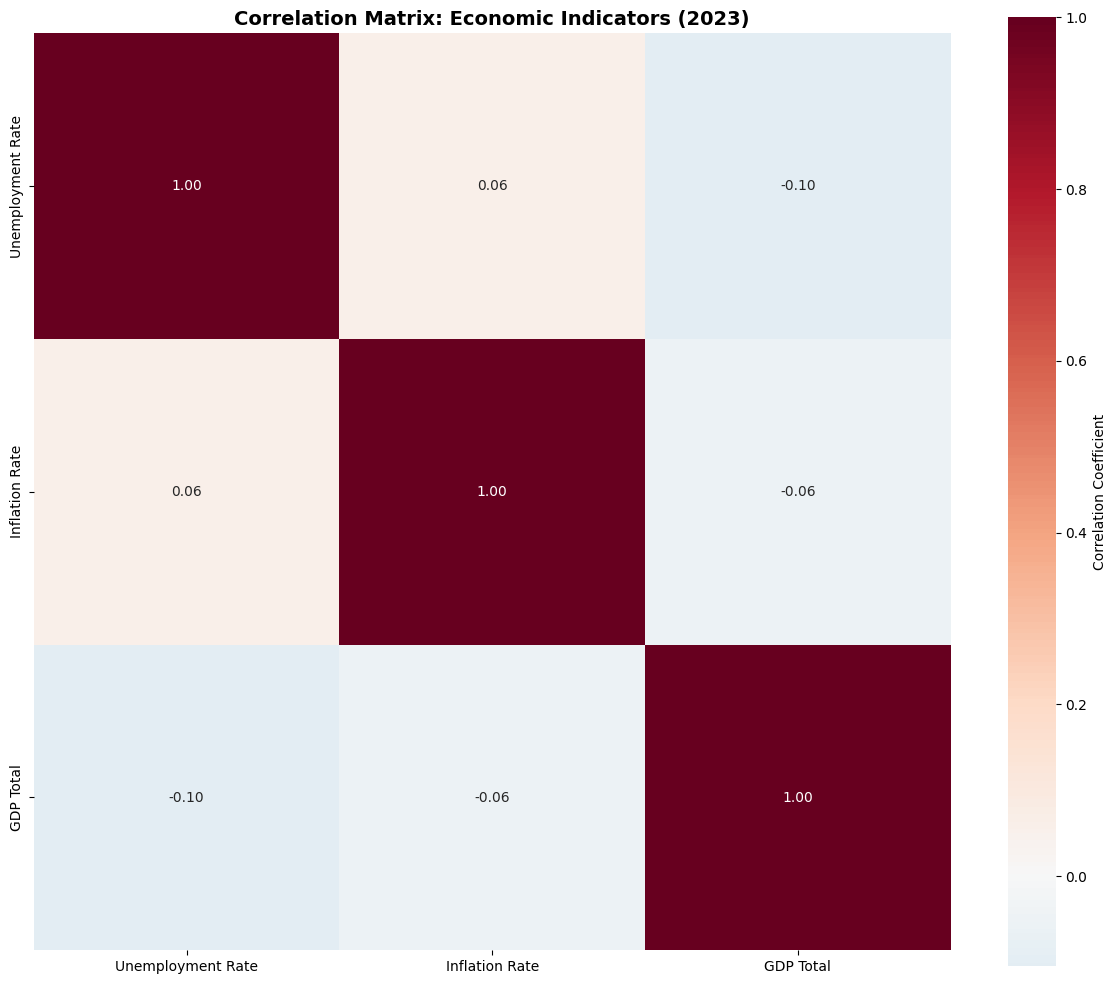

Correlation Analysis Summary:
                   Unemployment Rate  Inflation Rate  GDP Total
Unemployment Rate               1.00            0.06      -0.10
Inflation Rate                  0.06            1.00      -0.06
GDP Total                      -0.10           -0.06       1.00


In [24]:
# 创建相关性分析
plt.figure(figsize=(12, 10))

# 选择2023年的主要指标进行相关性分析
corr_data = merged_df[unemployment_2023 + inflation_2023 + gdp_pc_2023 + gdp_total_2023[:1]].copy()

# 重命名列使其更易读
column_mapping = {}
for col in corr_data.columns:
    if 'unemployment' in col.lower():
        column_mapping[col] = 'Unemployment Rate'
    elif 'inflation' in col.lower():
        column_mapping[col] = 'Inflation Rate' 
    elif 'per capita' in col.lower() or 'per_capita' in col.lower():
        column_mapping[col] = 'GDP Per Capita'
    elif 'gdp' in col.lower():
        column_mapping[col] = 'GDP Total'

corr_data = corr_data.rename(columns=column_mapping)

# 计算相关性矩阵
correlation_matrix = corr_data.corr()

# 创建热力图
sns.heatmap(correlation_matrix, 
           annot=True, 
           cmap='RdBu_r', 
           center=0,
           square=True,
           fmt='.2f',
           cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix: Economic Indicators (2023)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation Analysis Summary:")
print(correlation_matrix.round(2))

In [33]:
# DATA REALITY CHECK
print(f"Dataset dimensions: {merged_df.shape}")
print(f"Total columns: {len(merged_df.columns)}")

print(f"\nColumn types:")
print(merged_df.dtypes.value_counts())

print(f"\nColumns with most non-null values:")
non_null_counts = merged_df.count().sort_values(ascending=False)
print(non_null_counts.head(15))

empty_cols = merged_df.columns[merged_df.isnull().all()].tolist()
print(f"\nCompletely empty columns: {len(empty_cols)}")
if len(empty_cols) > 0:
    print("Examples:", empty_cols[:5])

nearly_empty = []
for col in merged_df.columns:
    non_null_pct = (merged_df[col].count() / len(merged_df)) * 100
    if non_null_pct < 5 and non_null_pct > 0:
        nearly_empty.append((col, non_null_pct))

print(f"\nNearly empty columns (<5% data): {len(nearly_empty)}")
for col, pct in nearly_empty[:5]:
    print(f"- {col}: {pct:.1f}% data")

Dataset dimensions: (266, 279)
Total columns: 279

Column types:
float64    265
object      14
Name: count, dtype: int64

Columns with most non-null values:
Country Name                   266
Country Code                   266
Indicator Code_unemployment    266
Indicator Name_unemployment    266
Indicator Code_inflation       266
Indicator Name_gdp_total       266
Indicator Name_inflation       266
Indicator Code_gdp_total       266
Indicator Code                 266
Indicator Name                 266
TableName                      265
2011                           262
2011_gdp_total                 262
2009                           261
2014                           261
dtype: int64

Completely empty columns: 36
Examples: ['1960_unemployment', '1961_unemployment', '1962_unemployment', '1963_unemployment', '1964_unemployment']

Nearly empty columns (<5% data): 0


In [28]:
#Find usable columns
usable_columns = []
for col in merged_df.columns:
    non_null_pct = (merged_df[col].count() / len(merged_df)) * 100
    if non_null_pct >= 20:  # over 20%
        if merged_df[col].dtype in ['int64', 'float64']:
            usable_columns.append((col, non_null_pct, 'numeric'))
        else:
            numeric_test = pd.to_numeric(merged_df[col], errors='coerce')
            if numeric_test.count() / len(merged_df) >= 0.2:
                usable_columns.append((col, non_null_pct, 'convertible'))
            else:
                usable_columns.append((col, non_null_pct, 'text'))

print(f"\nUsable columns (≥20% data):")
for col, pct, dtype in sorted(usable_columns, key=lambda x: x[1], reverse=True):
    print(f"- {col}: {pct:.1f}% ({dtype})")

print(f"\nEconomic indicators check:")
economic_keywords = ['gdp', 'inflation', 'unemployment', 'income']
for keyword in economic_keywords:
    relevant_cols = [col for col, pct, dtype in usable_columns 
                    if keyword in col.lower() and dtype in ['numeric', 'convertible']]
    print(f"{keyword.upper()}: {len(relevant_cols)} usable columns")
    for col in relevant_cols[:3]: 
        print(f"  - {col}")


Usable columns (≥20% data):
- Country Name: 100.0% (text)
- Country Code: 100.0% (text)
- Indicator Name_unemployment: 100.0% (text)
- Indicator Code_unemployment: 100.0% (text)
- Indicator Name_inflation: 100.0% (text)
- Indicator Code_inflation: 100.0% (text)
- Indicator Name: 100.0% (text)
- Indicator Code: 100.0% (text)
- Indicator Name_gdp_total: 100.0% (text)
- Indicator Code_gdp_total: 100.0% (text)
- TableName: 99.6% (text)
- 2011: 98.5% (numeric)
- 2011_gdp_total: 98.5% (numeric)
- 2009: 98.1% (numeric)
- 2010: 98.1% (numeric)
- 2014: 98.1% (numeric)
- 2009_gdp_total: 98.1% (numeric)
- 2010_gdp_total: 98.1% (numeric)
- 2014_gdp_total: 98.1% (numeric)
- 2012: 97.7% (numeric)
- 2013: 97.7% (numeric)
- 2012_gdp_total: 97.7% (numeric)
- 2013_gdp_total: 97.7% (numeric)
- 2008: 97.4% (numeric)
- 2015: 97.4% (numeric)
- 2019: 97.4% (numeric)
- 2008_gdp_total: 97.4% (numeric)
- 2015_gdp_total: 97.4% (numeric)
- 2006: 97.0% (numeric)
- 2007: 97.0% (numeric)
- 2016: 97.0% (numeric)
- 2

In [29]:
# VISUALIZATION FEASIBILITY
print(f"Countries in dataset: {merged_df['Country Name'].nunique()}")
print(f"Sample countries:", list(merged_df['Country Name'].dropna().unique()[:10]))

years_in_columns = set()
for col in merged_df.columns:
    for year in range(1990, 2025):
        if str(year) in col:
            years_in_columns.add(year)

print(f"\nYears found in column names: {sorted(years_in_columns)}")
print(f"Year range: {min(years_in_columns) if years_in_columns else 'None'} - {max(years_in_columns) if years_in_columns else 'None'}")

numeric_cols = [col for col, pct, dtype in usable_columns if dtype in ['numeric', 'convertible']]
print(f"\nScatter plot feasibility:")
print(f"- Numeric columns available: {len(numeric_cols)}")
print(f"- Minimum needed: 2")
print(f"- Can create scatter plots: {'YES' if len(numeric_cols) >= 2 else 'NO'}")

time_series_possible = False
if years_in_columns and len(years_in_columns) >= 3:
    for keyword in ['gdp', 'inflation', 'unemployment']:
        yearly_cols = [col for col in merged_df.columns 
                      if keyword in col.lower() and any(str(year) in col for year in years_in_columns)]
        if len(yearly_cols) >= 3:
            time_series_possible = True
            break

print(f"\nTime series feasibility:")
print(f"- Years available: {len(years_in_columns)}")
print(f"- Minimum needed: 3")
print(f"- Can create time series: {'YES' if time_series_possible else 'NO'}")


=== VISUALIZATION FEASIBILITY ===
Countries in dataset: 266
Sample countries: ['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World']

Years found in column names: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Year range: 1990 - 2024

Scatter plot feasibility:
- Numeric columns available: 229
- Minimum needed: 2
- Can create scatter plots: YES

Time series feasibility:
- Years available: 35
- Minimum needed: 3
- Can create time series: YES


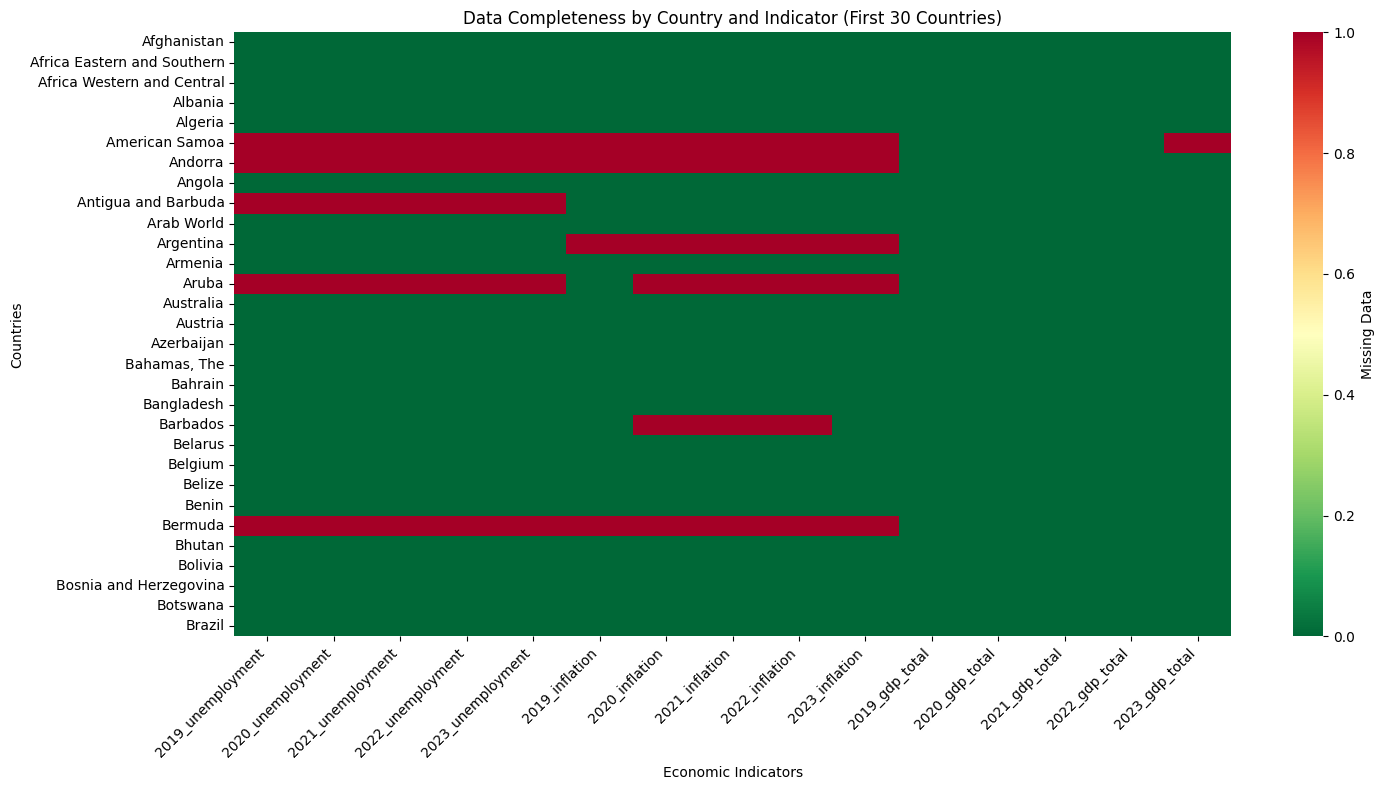

In [35]:
plt.figure(figsize=(15, 8))

indicator_cols = unemployment_cols + inflation_cols + gdp_pc_cols[:5] + gdp_total_cols[:5]  # 限制列数
indicator_data = merged_df[['Country Name'] + indicator_cols].set_index('Country Name')

missing_data = indicator_data.isnull()

sns.heatmap(missing_data.iloc[:30], 
           cmap='RdYlGn_r', 
           cbar_kws={'label': 'Missing Data'})
plt.title('Data Completeness by Country and Indicator (First 30 Countries)')
plt.xlabel('Economic Indicators')
plt.ylabel('Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
complete_countries = []
for idx, row in merged_df.iterrows():
    test_cols = []
    for year in ['2019', '2020', '2021', '2022', '2023']:
        test_cols.extend([col for col in merged_df.columns if year in col and any(ind in col.lower() for ind in ['unemployment', 'inflation', 'gdp'])])
    
    if len(test_cols) > 0:
        completeness = row[test_cols].notna().sum() / len(test_cols)
        if completeness > 0.7:  
            complete_countries.append(row['Country Name'])

print(f"Countries with >70% data completeness: {len(complete_countries)}")
print("Sample countries:", complete_countries[:10])

df_complete = merged_df[merged_df['Country Name'].isin(complete_countries)].copy()
print(f"Analysis dataset: {df_complete.shape}")

Countries with >70% data completeness: 217
Sample countries: ['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'Angola', 'Arab World', 'Armenia', 'Australia', 'Austria']
Analysis dataset: (217, 279)


In [37]:
key_tourism_countries = [
    'Australia', 'China', 'United States', 'United Kingdom', 
    'Japan', 'New Zealand', 'Germany', 'Canada', 
    'Korea, Rep.', 'India', 'Singapore'
]

available_countries = []
for country in key_tourism_countries:
    if country in merged_df['Country Name'].values:
        available_countries.append(country)

print("Available key tourism countries:")
for country in available_countries:
    print(f"- {country}")

df_key_countries = merged_df[merged_df['Country Name'].isin(available_countries)].copy()

Available key tourism countries:
- Australia
- China
- United States
- United Kingdom
- Japan
- New Zealand
- Germany
- Canada
- Korea, Rep.
- India
- Singapore
